In [1]:
##Import Librairies


In [2]:
import pandas as pd
import os

In [3]:
###Merging 12 months of sales data into Single File

In [4]:
files = [file for file in os.listdir("./DataSet/Analyse_sale")if file != '.ipynb_checkpoints']
all_months_data= pd.DataFrame()
for file in files:
    print(file)
    df = pd.read_csv("./DataSet/Analyse_sale/"+file)
    print(df.head())
    all_months_data = pd.concat ([all_months_data, df])
all_months_data.to_csv("./DataSet/Analyse_sale/all_data.csv", index=False)
    
                                     
         
                                

all_data.csv
  Order ID                     Product Quantity Ordered Price Each  \
0   176558        USB-C Charging Cable                2      11.95   
1      NaN                         NaN              NaN        NaN   
2   176559  Bose SoundSport Headphones                1      99.99   
3   176560                Google Phone                1        600   
4   176560            Wired Headphones                1      11.99   

       Order Date                      Purchase Address  
0  04/19/19 08:46          917 1st St, Dallas, TX 75001  
1             NaN                                   NaN  
2  04/07/19 22:30     682 Chestnut St, Boston, MA 02215  
3  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001  
4  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001  
Sales_April_2019.csv
  Order ID                     Product Quantity Ordered Price Each  \
0   176558        USB-C Charging Cable                2      11.95   
1      NaN                         NaN              NaN  

In [5]:
### Read in updated Dataframe


In [6]:
### Ajout Data Colonne ( Month )

In [7]:
all_data = pd.read_csv("./DataSet/Analyse_sale/all_data.csv")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [8]:
### Clean Data

In [9]:
###Drop NaN rows

In [10]:
nan_df= all_data[all_data.isna().any(axis=1)]
nan_df.head()

all_data = all_data.dropna(how="all")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [11]:
### find useless data ' " or" in order data

In [12]:
all_data = all_data[all_data["Order Date"].str[0:2] !="Or"]
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
1693331,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
1693332,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
1693333,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
1693334,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In [13]:
### Convert column to the correct type

In [14]:
all_data["Quantity Ordered"] = pd.to_numeric(all_data["Quantity Ordered"])
all_data["Price Each"] =  pd.to_numeric(all_data["Price Each"])

In [15]:
### Get Column Data

In [16]:
all_data["Month"] = all_data["Order Date"].str[0:2]
all_data["Month"] = all_data ["Month"].astype("int")
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4
...,...,...,...,...,...,...,...
1693331,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9
1693332,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9
1693333,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9
1693334,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9


In [17]:
### Ajout column city

In [18]:
all_data["City"] = all_data["Purchase Address"].apply(lambda x : x.split(",") [1])

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,Boston
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,Los Angeles


In [19]:
all_data["State"] = all_data["Purchase Address"].apply(lambda x : x.split(",") [2].split(' ')[1])
all_data["State"]

0          TX
2          MA
3          CA
4          CA
5          CA
           ..
1693331    CA
1693332    CA
1693333    CA
1693334    CA
1693335    CA
Name: State, Length: 1685179, dtype: object

In [20]:
all_data = all_data.reset_index(drop=True)
all_data["City(state)"] = all_data["City"] + ', ' + all_data["State"]
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,State,City(state)
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,Dallas,TX,"Dallas, TX"
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,Boston,MA,"Boston, MA"
2,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles,CA,"Los Angeles, CA"
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles,CA,"Los Angeles, CA"
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,Los Angeles,CA,"Los Angeles, CA"
...,...,...,...,...,...,...,...,...,...,...
1685174,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9,Los Angeles,CA,"Los Angeles, CA"
1685175,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9,San Francisco,CA,"San Francisco, CA"
1685176,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9,San Francisco,CA,"San Francisco, CA"
1685177,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9,San Francisco,CA,"San Francisco, CA"


In [21]:
print(all_data["City"].isna().sum())
print(all_data["State"].isna().sum())
print(all_data["City"].unique())
print(all_data["State"].unique())

0
0
[' Dallas' ' Boston' ' Los Angeles' ' San Francisco' ' Seattle' ' Atlanta'
 ' New York City' ' Portland' ' Austin']
['TX' 'MA' 'CA' 'WA' 'GA' 'NY' 'OR' 'ME']


In [22]:
### Quel est le meilleur mois de vente ? quelle est le gain total ?

In [23]:
### Ajout d'une colonne sales

In [24]:
all_data["Sales"] = all_data["Quantity Ordered"]*all_data["Price Each"]
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,State,City(state),Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,Dallas,TX,"Dallas, TX",23.90
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,Boston,MA,"Boston, MA",99.99
2,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles,CA,"Los Angeles, CA",600.00
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles,CA,"Los Angeles, CA",11.99
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,Los Angeles,CA,"Los Angeles, CA",11.99


In [25]:
 results = all_data.groupby("Month").sum()
results

,Quantity Ordered,Price Each,Sales
Month,,,
1,98127,16305915.42,16400310.57
2,121041,19699962.48,19818201.78
3,153045,25120870.47,25263903.42
4,185022,30309039.18,30516032.16
5,168003,28216126.17,28373460.75
6,137277,23058230.49,23200220.34
7,144648,23692856.04,23829981.84
8,121032,20073108.78,20200210.92
9,131078,20847824.16,20973504.56


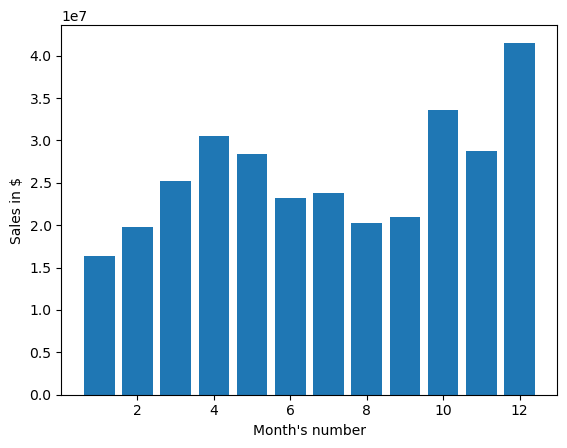

In [26]:
import matplotlib.pyplot as plt

months = range(1,13)
plt.bar(months,results["Sales"])

plt.xlabel("Month's number")
plt.ylabel("Sales in $")
plt.show()

In [27]:
### Quelle ville fait le plus de vente 

In [28]:
results = all_data.groupby("City(state)").sum()
results


,Quantity Ordered,Price Each,Month,Sales
City(state),,,,
"Atlanta, GA",150453,25189097.65,951381,25330766.11
"Austin, TX",101143,16394815.30,634458,16482846.34
"Boston, MA",204207,32982239.66,1281556,33202146.82
"Dallas, TX",151624,24936729.40,949996,25075994.45
"Los Angeles, CA",301726,49145585.62,1891885,49427355.62
"New York City, NY",253099,42018045.50,1595496,42280147.64
"Portland, ME",24911,4053360.29,155601,4076583.99
"Portland, OR",102395,16848561.94,640936,16940780.98
"San Francisco, CA",455237,74365021.67,2864293,74824364.84


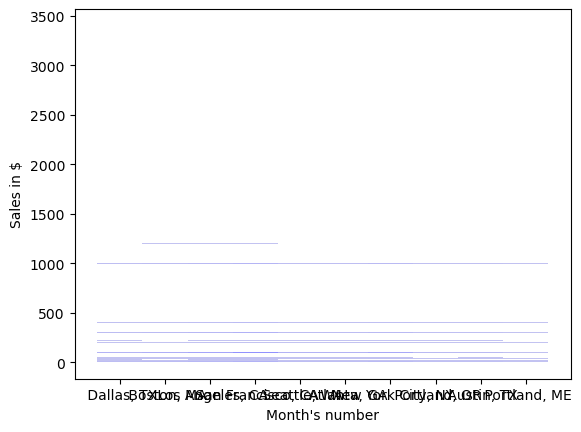

In [29]:
import seaborn as sns

sns.histplot(x=all_data["City(state)"], y=all_data['Sales'], color='blue')

plt.xlabel("Month's number")
plt.ylabel("Sales in $")
plt.show()

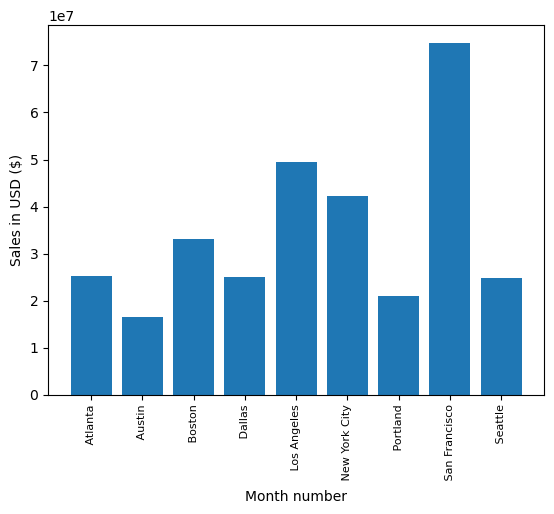

In [30]:


import matplotlib.pyplot as plt

keys = [city for city, df in all_data.groupby(['City'])]

plt.bar(keys,all_data.groupby(['City']).sum()['Sales'])
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month number')
plt.xticks(keys, rotation='vertical', size=8)
plt.show()



In [31]:
all_data


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,State,City(state),Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,Dallas,TX,"Dallas, TX",23.90
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,Boston,MA,"Boston, MA",99.99
2,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles,CA,"Los Angeles, CA",600.00
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles,CA,"Los Angeles, CA",11.99
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,Los Angeles,CA,"Los Angeles, CA",11.99
...,...,...,...,...,...,...,...,...,...,...,...
1685174,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9,Los Angeles,CA,"Los Angeles, CA",8.97
1685175,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9,San Francisco,CA,"San Francisco, CA",700.00
1685176,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9,San Francisco,CA,"San Francisco, CA",700.00
1685177,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9,San Francisco,CA,"San Francisco, CA",379.99


In [32]:
### Vers quelle heure  doit on placer des publicités afin d'augmenter d'avantage les profits générés

In [34]:
all_data["Order Date"] = pd.to_datetime(all_data["Order Date"])
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,State,City(state),Sales
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,Dallas,TX,"Dallas, TX",23.90
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,Boston,MA,"Boston, MA",99.99
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles,CA,"Los Angeles, CA",600.00
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles,CA,"Los Angeles, CA",11.99
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,Los Angeles,CA,"Los Angeles, CA",11.99


In [36]:
all_data["Hour"] = all_data["Order Date"].dt.hour
all_data["Minute"] =  all_data["Order Date"].dt.minute
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,State,City(state),Sales,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,Dallas,TX,"Dallas, TX",23.90,8,46
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,Boston,MA,"Boston, MA",99.99,22,30
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles,CA,"Los Angeles, CA",600.00,14,38
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles,CA,"Los Angeles, CA",11.99,14,38
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,Los Angeles,CA,"Los Angeles, CA",11.99,9,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1685174,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",9,Los Angeles,CA,"Los Angeles, CA",8.97,20,56
1685175,259354,iPhone,1,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",9,San Francisco,CA,"San Francisco, CA",700.00,16,0
1685176,259355,iPhone,1,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",9,San Francisco,CA,"San Francisco, CA",700.00,7,39
1685177,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",9,San Francisco,CA,"San Francisco, CA",379.99,17,30


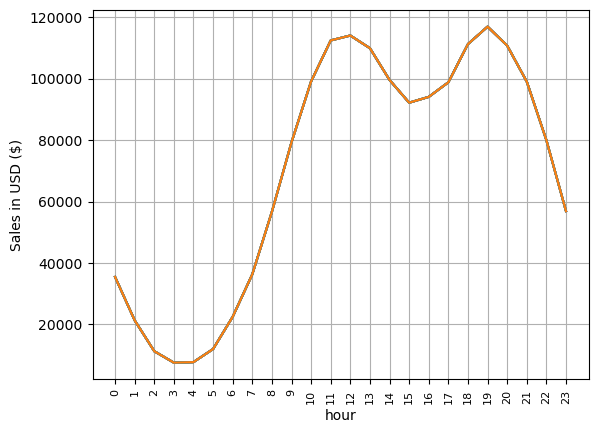

In [37]:
hours = [hour for hour, df in all_data.groupby(['Hour'])]

plt.plot(hours,all_data.groupby(['Hour']).count())
plt.ylabel('Sales in USD ($)')
plt.grid()
plt.xlabel('hour')
plt.xticks(hours, rotation='vertical', size=8)
plt.show()

In [35]:
### Quels produits sont souvent vendus ensemble ?


In [38]:
# https://stackoverflow.com/questions/43348194/pandas-select-rows-if-id-appear-several-time
df = all_data[all_data['Order ID'].duplicated(keep=False)]

# Referenced: https://stackoverflow.com/questions/27298178/concatenate-strings-from-several-rows-using-pandas-groupby
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df2 = df[['Order ID', 'Grouped']].drop_duplicates()

In [39]:
# Referenced: https://stackoverflow.com/questions/52195887/counting-unique-pairs-of-numbers-into-a-python-dictionary
from itertools import combinations
from collections import Counter

count = Counter()

for row in df2['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

for key,value in count.most_common(10):
    print(key, value)

('USB-C Charging Cable', 'USB-C Charging Cable') 805539
('Lightning Charging Cable', 'Lightning Charging Cable') 796099
('AAA Batteries (4-pack)', 'AAA Batteries (4-pack)') 758539
('AA Batteries (4-pack)', 'AA Batteries (4-pack)') 755479
('Wired Headphones', 'Wired Headphones') 693200
('Apple Airpods Headphones', 'Apple Airpods Headphones') 570460
('Bose SoundSport Headphones', 'Bose SoundSport Headphones') 489321
('27in FHD Monitor', '27in FHD Monitor') 275330
('iPhone', 'iPhone') 250047
('27in 4K Gaming Monitor', '27in 4K Gaming Monitor') 228114


In [40]:
### What product sold the most? Why do you think it sold the most?

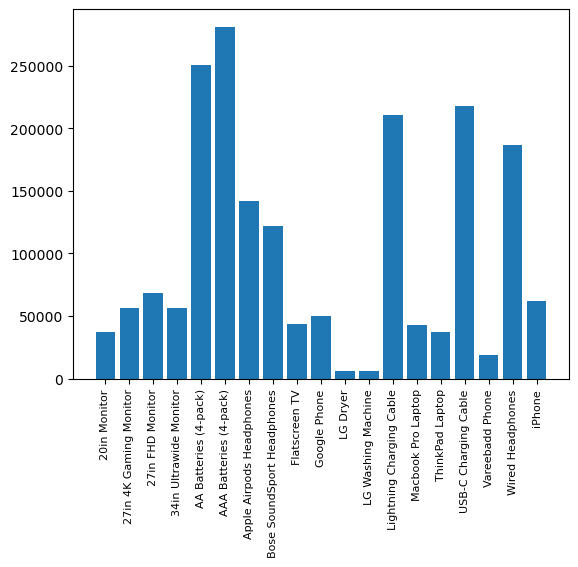

In [41]:
product_group = all_data.groupby('Product')
quantity_ordered = product_group.sum()['Quantity Ordered']

keys = [pair for pair, df in product_group]
plt.bar(keys, quantity_ordered)
plt.xticks(keys, rotation='vertical', size=8)
plt.show()

C:\Users\SKONIECZNY\AppData\Local\Temp\ipykernel_4912\136096346.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(keys, rotation='vertical', size=8)
C:\Users\SKONIECZNY\AppData\Local\Temp\ipykernel_4912\136096346.py:16: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


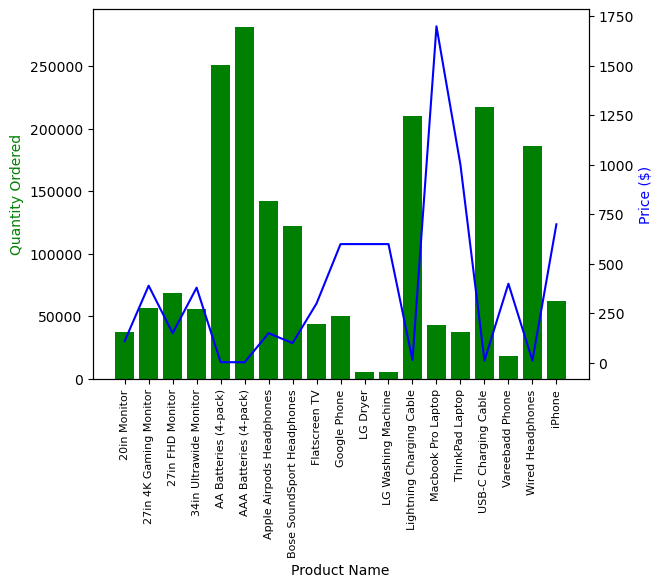

In [42]:
# Referenced: https://stackoverflow.com/questions/14762181/adding-a-y-axis-label-to-secondary-y-axis-in-matplotlib

prices = all_data.groupby('Product').mean()['Price Each']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(keys, quantity_ordered, color='g')
ax2.plot(keys, prices, color='b')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='b')
ax1.set_xticklabels(keys, rotation='vertical', size=8)

fig.show()